
# Dithering Telescope - random offsets
In this notebook, one can set a sky position to look at (boresight position) and a source (with profile and position) and study the effect of possible telescope offsets (such as fiber positioner offset, boresight offsets) on the signal-to-noise ratio (SNR).


In [1]:
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import dithering


After the general packages and the special package "dithering" is imported, one start with setting the source and boresight positions. By default, "generate_source()" function generates a source like a QSO. For other types of sources, you can uncomment/comment the lines below.


### Constructing the object

One can uncomment/comment a source below to study

In [2]:
dit    = dithering.dithering()
# QSO
#source = dit.generate_source(disk_fraction=0., bulge_fraction=0.)
#source_type = 'qso'
# ELG
source = dit.generate_source(disk_fraction=1., bulge_fraction=0.)
source_type = 'elg'
# LRG
#source = dit.generate_source(disk_fraction=0., bulge_fraction=1.)
#source_type = 'lrg'
dit.set_source_position(20.*u.deg, 25.*u.deg)
dit.set_boresight_position(20.*u.deg, 24.5*u.deg)
dit.set_focal_plane_position()
dit.run_simulation(source_type, *source, report=True)

boresight position is   : 20.000 deg , 24.500 deg
source position is      : 20.000 deg , 25.000 deg
fiber position is       : 119.067 mm , 0.178 mm
focal plane position is : 119.067 mm , 0.178 mm
fiber placement         : [ 0.] um, [ 0.] um
With the current configuration, SNR are:
-- camera r: 2.807 / 0.5 Angstrom
-- camera b: 3.549 / 0.5 Angstrom
-- camera z: 2.050 / 0.5 Angstrom


### Rotating the positioner along $\Phi$ and $\Theta$

If the fiber aperture is not covering the source, we may have to move the fiber around a bit to find the maximum
The example below starts from -2 degrees and scans up to 2 degrees to find the maximum.

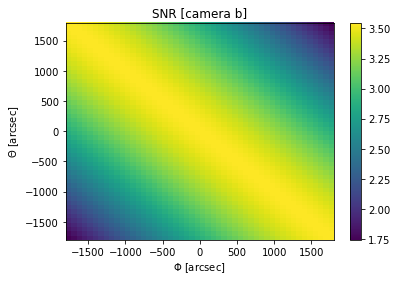

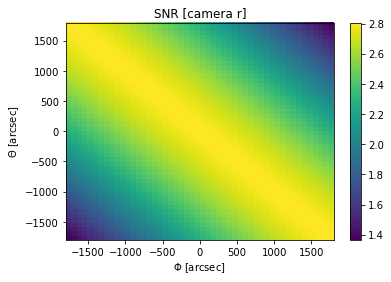

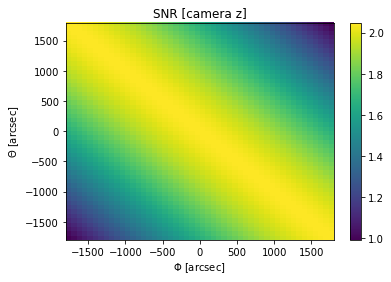

In [3]:
#dit.change_alt_az_bore_position(20.*u.deg, 24.5*u.deg)
nbins = 50
#dit.set_focal_plane_position()
rotations = np.linspace(-.5, .5, nbins)
dit.set_positioner_theta(0*u.deg)
dit.set_positioner_phi(0*u.deg)
dit.make_positioner_rotation()
thetas = []
phis   = []
SNR_b  = []
SNR_r  = []
SNR_z  = []
for i in range(nbins):
    for j in range(nbins):
        dit.set_positioner_phi(rotations[i]*u.deg)
        dit.set_positioner_theta(rotations[j]*u.deg)
        dit.make_positioner_rotation()
        dit.run_simulation(source_type, *source, report=False)
        phis.append((rotations[i]*u.deg).to(u.arcsec).value)
        thetas.append((rotations[j]*u.deg).to(u.arcsec).value)
        SNR_b.append(np.median(dit.SNR['b'][0]))
        SNR_r.append(np.median(dit.SNR['r'][0]))
        SNR_z.append(np.median(dit.SNR['z'][0]))
# camera b
plt.hist2d(phis, thetas, weights=SNR_b, bins=nbins)
plt.xlabel("$\Phi$ [arcsec]")
plt.ylabel("$\Theta$ [arcsec]")
plt.title("SNR [camera b]")
plt.colorbar()
plt.show()
# camera r
plt.hist2d(phis, thetas, weights=SNR_r, bins=nbins)
plt.xlabel("$\Phi$ [arcsec]")
plt.ylabel("$\Theta$ [arcsec]")
plt.title("SNR [camera r]")
plt.colorbar()
plt.show()
# camera z
plt.hist2d(phis, thetas, weights=SNR_z, bins=nbins)
plt.xlabel("$\Phi$ [arcsec]")
plt.ylabel("$\Theta$ [arcsec]")
plt.title("SNR [camera z]")
plt.colorbar()
plt.show()

### Testing the random offsets - simple case
Here we report some of the conditions of the simulation before we start changing them. Then we add random fiber placement offsets.

In [4]:
print("Nominal results:")
dit.set_positioner_theta(0*u.deg)
dit.set_positioner_phi(0*u.deg)
dit.make_positioner_rotation()
dit.run_simulation(source_type, *source)
# adding some random offset
dit.add_random_offset_fiber_position(var_x=5*u.um)
print("------------------------------")
print("With fiber positioner offsets:")
dit.run_simulation(source_type, *source)

Nominal results:
boresight position is   : 20.000 deg , 24.500 deg
source position is      : 20.000 deg , 25.000 deg
fiber position is       : 119.067 mm , 0.178 mm
focal plane position is : 119.067 mm , 0.178 mm
fiber placement         : [ 0.] um, [ -1.73372428e-12] um
With the current configuration, SNR are:
-- camera r: 2.807 / 0.5 Angstrom
-- camera b: 3.549 / 0.5 Angstrom
-- camera z: 2.050 / 0.5 Angstrom
------------------------------
With fiber positioner offsets:
boresight position is   : 20.000 deg , 24.500 deg
source position is      : 20.000 deg , 25.000 deg
fiber position is       : 119.070 mm , 0.180 mm
focal plane position is : 119.067 mm , 0.178 mm
fiber placement         : [ 3.01315809] um, [ 2.41574889] um
With the current configuration, SNR are:
-- camera r: 2.776 / 0.5 Angstrom
-- camera b: 3.510 / 0.5 Angstrom
-- camera z: 2.027 / 0.5 Angstrom


### Testing the random offsets - random fiber positioner offsets

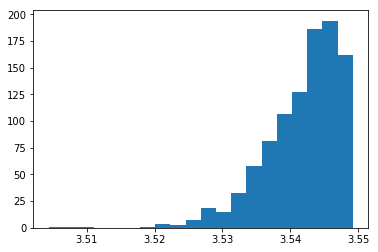

In [ ]:
dit.set_positioner_theta(0*u.deg)
dit.set_positioner_phi(0*u.deg)
dit.make_positioner_rotation()
dit.run_simulation(source_type, *source, report=False)
num_iterations = 1000
snr_b = []
snr_r = []
snr_z = []
for i in range(num_iterations):
    # move the fiber to its initial point before randomly moving it
    dit.set_focal_plane_position()
    dit.add_random_offset_fiber_position()
    dit.run_simulation(source_type, *source, report=False)
    snr_b.append(np.median(dit.SNR['b'][0]))
    snr_r.append(np.median(dit.SNR['r'][0]))
    snr_z.append(np.median(dit.SNR['z'][0]))
plt.clf()
plt.hist(snr_b, bins = 20)
plt.show()

### Testing the random offsets - random fiber positioner offsets
One difference between the previous cell and the one below is that we introduce 1 arcsec movement to the telescope in azimuthal direction

In [ ]:
dit.set_positioner_theta(0*u.deg)
dit.set_positioner_phi(0*u.deg)
dit.make_positioner_rotation()
dit.set_boresight_position(20.*u.deg, 24.5*u.deg+1*u.arcsec)
dit.run_simulation(source_type, *source, report=False)
num_iterations = 1000
snr_b = []
snr_r = []
snr_z = []
for i in range(num_iterations):
    # move the fiber to its initial point before randomly moving it
    dit.set_focal_plane_position()
    dit.add_random_offset_fiber_position()
    dit.run_simulation(source_type, *source, report=False)
    snr_b.append(np.median(dit.SNR['b'][0]))
    snr_r.append(np.median(dit.SNR['r'][0]))
    snr_z.append(np.median(dit.SNR['z'][0]))
plt.clf()
plt.hist(snr_b, bins = 20)
plt.show()

### Testing random offsets - random boresight altitude offsets

In [ ]:
dit.set_positioner_theta(0*u.deg)
dit.set_positioner_phi(0*u.deg)
dit.make_positioner_rotation()
dit.set_boresight_position(20.*u.deg, 24.5*u.deg)
dit.set_focal_plane_position()
dit.run_simulation(source_type, *source, report=False)
num_iterations = 1000
snr_b = []
snr_r = []
snr_z = []
for i in range(num_iterations):
    # move the fiber to its initial point before randomly moving it
    #dit.set_focal_plane_position()
    dit.set_boresight_position(20.*u.deg, 24.5*u.deg)
    dit.set_focal_plane_position()
    dit.add_random_boresight_offset(var_az=0*u.arcsec)
    dit.run_simulation(source_type, *source, report=False)
    snr_b.append(np.median(dit.SNR['b'][0]))
    snr_r.append(np.median(dit.SNR['r'][0]))
    snr_z.append(np.median(dit.SNR['z'][0]))
plt.clf()
plt.hist(snr_b, bins = 20)
plt.show()

### Testing random offsets - random boresight azimuth offsets

In [ ]:
dit.set_positioner_theta(0*u.deg)
dit.set_positioner_phi(0*u.deg)
dit.make_positioner_rotation()
dit.set_boresight_position(20.*u.deg, 24.5*u.deg)
dit.set_focal_plane_position()
dit.run_simulation(source_type, *source, report=False)
num_iterations = 1000
snr_b = []
snr_r = []
snr_z = []
for i in range(num_iterations):
    # move the fiber to its initial point before randomly moving it
    #dit.set_focal_plane_position()
    dit.set_boresight_position(20.*u.deg, 24.5*u.deg)
    dit.set_focal_plane_position()
    dit.add_random_boresight_offset(var_alt=0*u.arcsec)
    dit.run_simulation(source_type, *source, report=False)
    snr_b.append(np.median(dit.SNR['b'][0]))
    snr_r.append(np.median(dit.SNR['r'][0]))
    snr_z.append(np.median(dit.SNR['z'][0]))
plt.clf()
plt.hist(snr_b, bins = 20)
plt.show()

### Testing random offsets - random boresight azimuth and altitude offsets

In [ ]:
dit.set_positioner_theta(0*u.deg)
dit.set_positioner_phi(0*u.deg)
dit.make_positioner_rotation()
dit.set_boresight_position(20.*u.deg, 24.5*u.deg)
dit.set_focal_plane_position()
dit.run_simulation(source_type, *source, report=False)
num_iterations = 1000
snr_b = []
snr_r = []
snr_z = []
for i in range(num_iterations):
    # move the fiber to its initial point before randomly moving it
    #dit.set_focal_plane_position()
    dit.set_boresight_position(20.*u.deg, 24.5*u.deg)
    dit.set_focal_plane_position()
    dit.add_random_boresight_offset()
    dit.run_simulation(source_type, *source, report=False)
    snr_b.append(np.median(dit.SNR['b'][0]))
    snr_r.append(np.median(dit.SNR['r'][0]))
    snr_z.append(np.median(dit.SNR['z'][0]))
plt.clf()
plt.hist(snr_b, bins = 20)
plt.show()

In [ ]:
1*u.mrad.to(u.arcsec)